In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report



In [16]:
# Download NLTK resources for Bahasa Indonesia
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Load your preprocessed dataset
# Assuming your dataset has two columns: 'text' (news article) and 'label' (category)
data = pd.read_csv('/content/Newsdata.csv')

# Preprocess text data
stop_words = set(stopwords.words('indonesian'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords and stemming
    tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stop_words]
def preprocess_text(text):
    tokens = text.split()
    return ' '.join(tokens)

data['Title'] = data['Title'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Split data into features and labels
X = data['Title']
y = data['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [18]:
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [19]:
# Initialize classifiers
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SGD Classifier': SGDClassifier(),
    'LGBM Classifier': LGBMClassifier()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f'Training {clf_name}...')
    clf.fit(X_train_dense, y_train)

    print(f'Evaluating {clf_name}...')
    y_pred = clf.predict(X_test_dense)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))


# Optionally, you can save the best-performing model for later use
# Example:
# best_classifier = classifiers['Multinomial Naive Bayes']
# best_classifier.fit(X_train_tfidf, y_train)
# joblib.dump(best_classifier, 'best_classifier.pkl')


Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes...
Accuracy: 0.40
                                                                     precision    recall  f1-score   support

                                                     Budaya Membaca       0.36      0.13      0.19       105
 Budaya Membaca, Kegemaran membaca, Minat membaca, Literasi Membaca       0.00      0.00      0.00         1
                                      Budaya Membaca, Minat Membaca       0.00      0.00      0.00         1
                                            Budaya Membaca, kege,ar       0.00      0.00      0.00         1
                                                     Kegemaran Baca       0.42      0.17      0.24       121
                                         Kegemaran Baca, minat baca       0.00      0.00      0.00         1
                                      Kegemaran Baca, minat membaca       0.00      0.00      0.00         1
                                      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Gaussian Naive Bayes...
Accuracy: 0.34
                                                                     precision    recall  f1-score   support

                                                     Budaya Membaca       0.28      0.31      0.29       105
 Budaya Membaca, Kegemaran membaca, Minat membaca, Literasi Membaca       0.00      0.00      0.00         1
                                      Budaya Membaca, Minat Membaca       1.00      1.00      1.00         1
                                            Budaya Membaca, kege,ar       0.00      0.00      0.00         1
                                                     Kegemaran Baca       0.29      0.30      0.30       121
                                         Kegemaran Baca, minat baca       1.00      1.00      1.00         1
                                      Kegemaran Baca, minat membaca       1.00      1.00      1.00         1
                                                   Literasi Membaca       0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Evaluating Decision Tree...
Accuracy: 0.35
                                                                     precision    recall  f1-score   support

                                                     Budaya Membaca       0.24      0.32      0.28       105
 Budaya Membaca, Kegemaran membaca, Minat membaca, Literasi Membaca       0.00      0.00      0.00         1
                                      Budaya Membaca, Minat Membaca       1.00      1.00      1.00         1
                                            Budaya Membaca, kege,ar       0.00      0.00      0.00         1
                                                     Kegemaran Baca       0.22      0.17      0.19       121
                                         Kegemaran Baca, minat baca       1.00      1.00      1.00         1
                                      Kegemaran Baca, minat membaca       0.50      1.00      0.67         1
                                                   Literasi Membaca       0.39      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating SGD Classifier...
Accuracy: 0.39
                                                                     precision    recall  f1-score   support

                                                     Budaya Membaca       0.26      0.27      0.26       105
 Budaya Membaca, Kegemaran membaca, Minat membaca, Literasi Membaca       0.00      0.00      0.00         1
                                      Budaya Membaca, Minat Membaca       0.00      0.00      0.00         1
                                            Budaya Membaca, kege,ar       0.00      0.00      0.00         1
                                                     Kegemaran Baca       0.34      0.33      0.34       121
                                         Kegemaran Baca, minat baca       1.00      1.00      1.00         1
                                      Kegemaran Baca, minat membaca       1.00      1.00      1.00         1
                                                   Literasi Membaca       0.52     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2203
[LightGBM] [Info] Number of data points in the train set: 1912, number of used features: 114
[LightGBM] [Info] Start training from score -1.489797
[LightGBM] [Info] Start training from score -6.862758
[LightGBM] [Info] Start training from score -7.555905
[LightGBM] [Info] Start training from score -7.555905
[LightGBM] [Info] Start training from score -7.555905
[LightGBM] [Info] Start training from score -6.862758
[LightGBM] [Info] Start training from score -1.492120
[LightGBM] [Info] Start training from score -7.555905
[LightGBM] [Info] Start training from score -5.609995
[LightGBM] [Info] Start training from score -5.609995
[LightGBM] [Info] Start training from score -2.199319
[LightGBM] [Info] Start training from score -6.862758

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Convert sparse matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f'Training {clf_name}...')
    clf.fit(X_train_dense, y_train)

    print(f'Evaluating {clf_name}...')
    y_pred = clf.predict(X_test_dense)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes...
Accuracy: 0.40
                                                                     precision    recall  f1-score   support

                                                     Budaya Membaca       0.36      0.13      0.19       105
 Budaya Membaca, Kegemaran membaca, Minat membaca, Literasi Membaca       0.00      0.00      0.00         1
                                      Budaya Membaca, Minat Membaca       0.00      0.00      0.00         1
                                            Budaya Membaca, kege,ar       0.00      0.00      0.00         1
                                                     Kegemaran Baca       0.42      0.17      0.24       121
                                         Kegemaran Baca, minat baca       0.00      0.00      0.00         1
                                      Kegemaran Baca, minat membaca       0.00      0.00      0.00         1
                                      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Gaussian Naive Bayes...
Accuracy: 0.34
                                                                     precision    recall  f1-score   support

                                                     Budaya Membaca       0.28      0.31      0.29       105
 Budaya Membaca, Kegemaran membaca, Minat membaca, Literasi Membaca       0.00      0.00      0.00         1
                                      Budaya Membaca, Minat Membaca       1.00      1.00      1.00         1
                                            Budaya Membaca, kege,ar       0.00      0.00      0.00         1
                                                     Kegemaran Baca       0.29      0.30      0.30       121
                                         Kegemaran Baca, minat baca       1.00      1.00      1.00         1
                                      Kegemaran Baca, minat membaca       1.00      1.00      1.00         1
                                                   Literasi Membaca       0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Evaluating Decision Tree...
Accuracy: 0.35
                                                                     precision    recall  f1-score   support

                                                     Budaya Membaca       0.24      0.31      0.27       105
 Budaya Membaca, Kegemaran membaca, Minat membaca, Literasi Membaca       0.00      0.00      0.00         1
                                      Budaya Membaca, Minat Membaca       1.00      1.00      1.00         1
                                            Budaya Membaca, kege,ar       0.00      0.00      0.00         1
                                                     Kegemaran Baca       0.26      0.21      0.24       121
                                         Kegemaran Baca, minat baca       0.33      1.00      0.50         1
                                      Kegemaran Baca, minat membaca       1.00      1.00      1.00         1
                                                   Literasi Membaca       0.44      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Evaluating SGD Classifier...
Accuracy: 0.39
                                                                     precision    recall  f1-score   support

                                                     Budaya Membaca       0.28      0.25      0.26       105
 Budaya Membaca, Kegemaran membaca, Minat membaca, Literasi Membaca       0.00      0.00      0.00         1
                                      Budaya Membaca, Minat Membaca       1.00      1.00      1.00         1
                                            Budaya Membaca, kege,ar       0.00      0.00      0.00         1
                                                     Kegemaran Baca       0.34      0.35      0.34       121
                                         Kegemaran Baca, minat baca       1.00      1.00      1.00         1
                                      Kegemaran Baca, minat membaca       1.00      1.00      1.00         1
                                                   Literasi Membaca       0.47     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
!pip install scikit-learn

In [22]:
from sklearn.metrics import f1_score

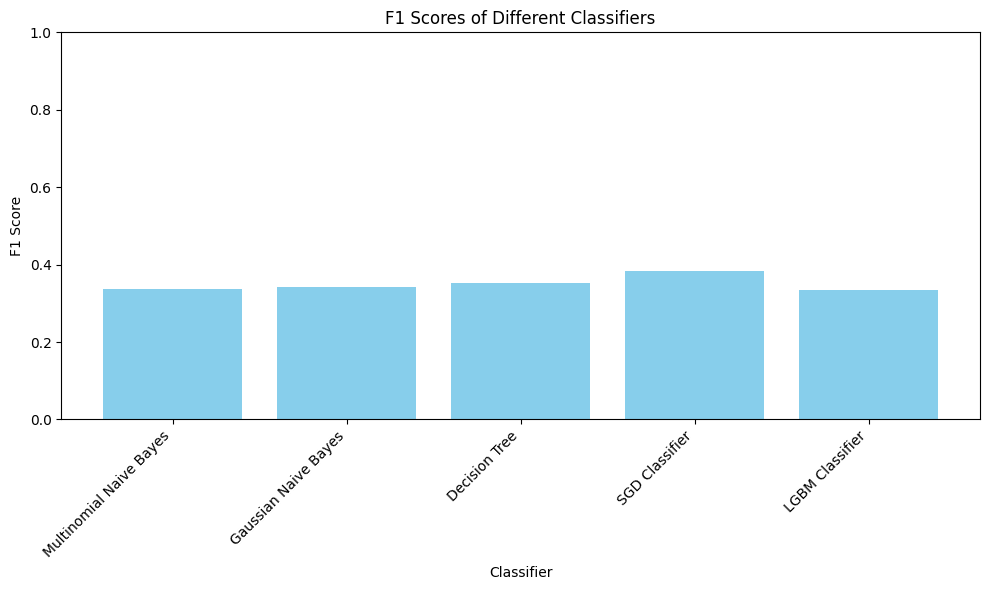

In [23]:
# Calculate F1 scores for each classifier
f1_scores = {}
for clf_name, clf in classifiers.items():
    y_pred = clf.predict(X_test_dense)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[clf_name] = f1

# Create a bar plot of F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()